# Store Sales Prediction


### The success of any retail store depends upon its sales. More the sales made,more is the revenue. With 
a good customer service and care, the customer too enjoys a good shopping experience. This will lead to more in-flow of customers, opening more store branches across a city / country.
 
Many medium to large stores implement this kind of analytics to understand trends like which products 
are getting sold faster, what are the slow moving products, impact of store types, etc. With new branches of the store, the analysis can get more complex and may also involve stiff competition from other competitors.

# Business Objective

### ● Build a model to predict the Sales of a Store

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error          
from sklearn import preprocessing  
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
%matplotlib inline

## Importing data:

In [3]:
df=pd.read_csv("C:/Users/sania/OneDrive/Documents/DS3_C6_S1_Regression_StoreSales_Data_Project.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [5]:
df.shape

(14204, 12)

In [6]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
# Separating out the categorical and continuous variables
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 100:       # nunique:  returns unique values in the column,
                                                    #here 100 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "continuous": continuous}, headers = ["categorical", "continuous"]))

categorical                continuous
-------------------------  -----------------
Item_Fat_Content           Item_Identifier
Item_Type                  Item_Weight
Outlet_Identifier          Item_Visibility
Outlet_Establishment_Year  Item_MRP
Outlet_Size                Item_Outlet_Sales
Outlet_Location_Type
Outlet_Type


# Univariate Data Analysis

In [13]:
def info_of_cat(col): 
    print(f"Unique values: {df[col].unique()}") 
    # unique: returns the unique values in the col
    print(f"Mode: {df[col].mode()[0]}")
    # mode: returns the mode of the column
    print(f"Number of missing values:{df[col].isnull().sum()}")
    # isnull().sum() counts the number of null in dataframe
    if df[col].isnull().sum() > 0: 
        # check if null values are present
        print(f"\nThere are null values in the {col} column")
    

### Item_Fat_Content

In [14]:
info_of_cat('Item_Fat_Content')

Unique values: ['Low Fat' 'Regular']
Mode: Low Fat
Number of missing values:0


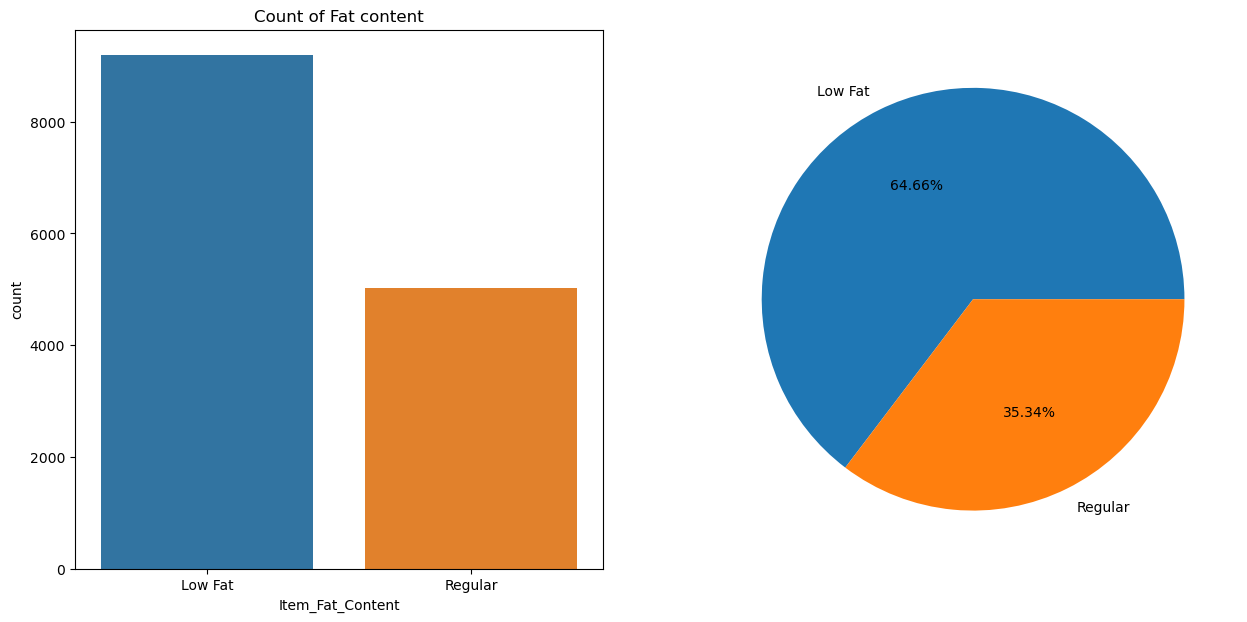

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Fat content")                  
# Set the title of the graph
percentage = df["Item_Fat_Content"].value_counts()        
# value_counts: returns the count of values in series: return series
labels = list(df["Item_Fat_Content"].value_counts().index)
# Converting the index of value counts into list

sns.countplot(x = df["Item_Fat_Content"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 
# autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

##### MOST OF THE FOOD TYPES HAVE LOW FAT CONTENT

## Item type

In [15]:
info_of_cat("Item_Type")

Unique values: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Mode: Fruits and Vegetables
Number of missing values:0


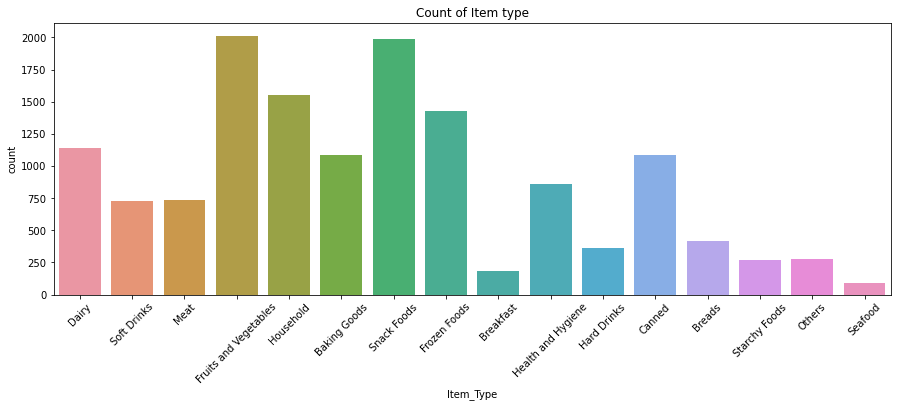

In [16]:
fig= plt.figure( figsize = (15, 5))
plt.title("Count of Item type")                
# Set the title of the graph
percentage = df["Item_Type"].value_counts()        
# value_counts: returns the count of values in series: return series
labels = list(df["Item_Type"].value_counts().index)
# Converting the index of value counts into list

sns.countplot(x = df["Item_Type"])
plt.xticks(rotation=45)
plt.show()

##### THERE ARE 16 DIFFERENT TYPES OF FOOD ITMES STARTING FROM DAIRY TO SEAFOOD

## Outlet Identifier

In [17]:
info_of_cat("Outlet_Identifier")

Unique values: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Mode: OUT027
Number of missing values:0


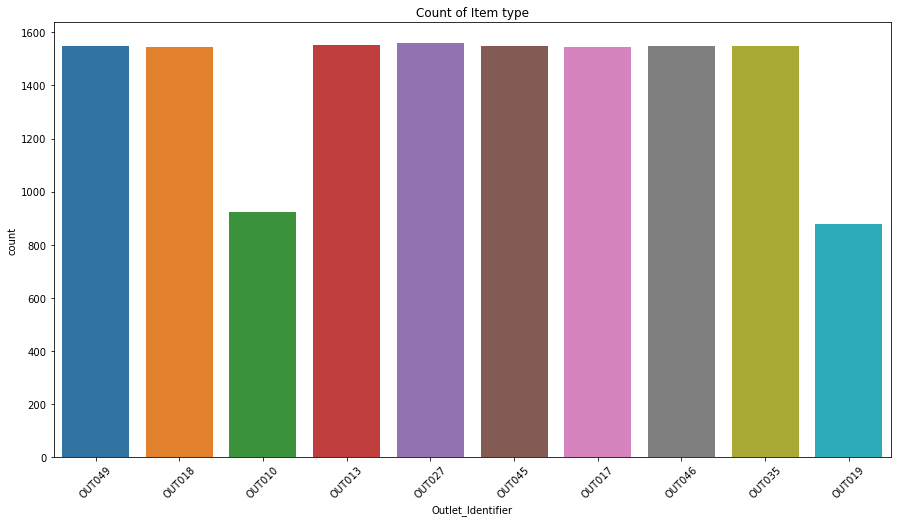

In [19]:
fig= plt.figure( figsize = (15, 8))
plt.title("Count of Item type")                 
# Set the title of the graph
percentage = df["Outlet_Identifier"].value_counts()        
# value_counts: returns the count of values in series: return series
labels = list(df["Outlet_Identifier"].value_counts().index)
# Converting the index of value counts into list

sns.countplot(x = df["Outlet_Identifier"])
plt.xticks(rotation=45)
plt.show()

#### OUT010 AND OUT019 ARE NOT WELL ESTABLISHED

## Outlet establishment year.

In [20]:
info_of_cat("Outlet_Establishment_Year")

Unique values: [1999 2009 1998 1987 1985 2002 2007 1997 2004]
Mode: 1985
Number of missing values:0


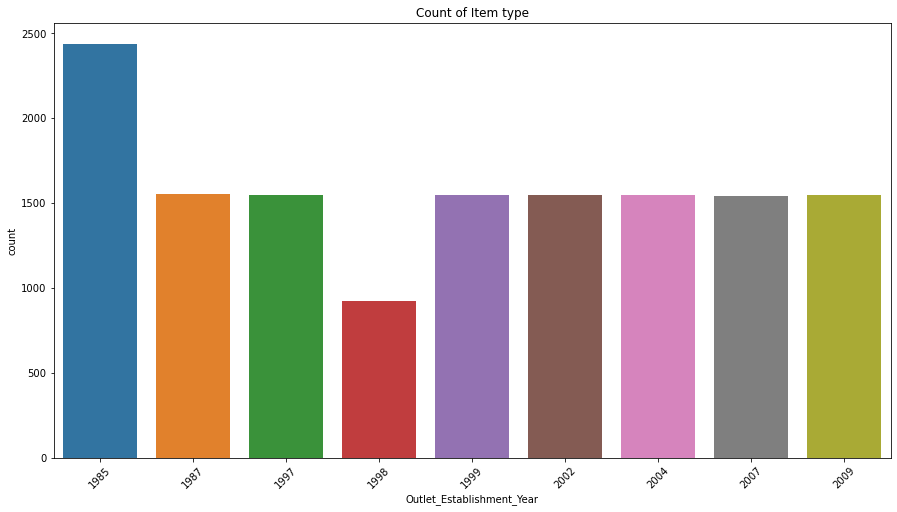

In [21]:
fig= plt.figure( figsize = (15, 8))
plt.title("Count of Item type")                 
# Set the title of the graph
percentage = df["Outlet_Establishment_Year"].value_counts()        
# value_counts: returns the count of values in series: return series
labels = list(df["Outlet_Establishment_Year"].value_counts().index)
# Converting the index of value counts into list

sns.countplot(x = df["Outlet_Establishment_Year"])
plt.xticks(rotation=45)
plt.show()

##### Most of the Outlets were established in 1985

## Outlet size.

In [22]:
info_of_cat("Outlet_Size")

Unique values: ['Medium' 'High' 'Small']
Mode: Small
Number of missing values:0


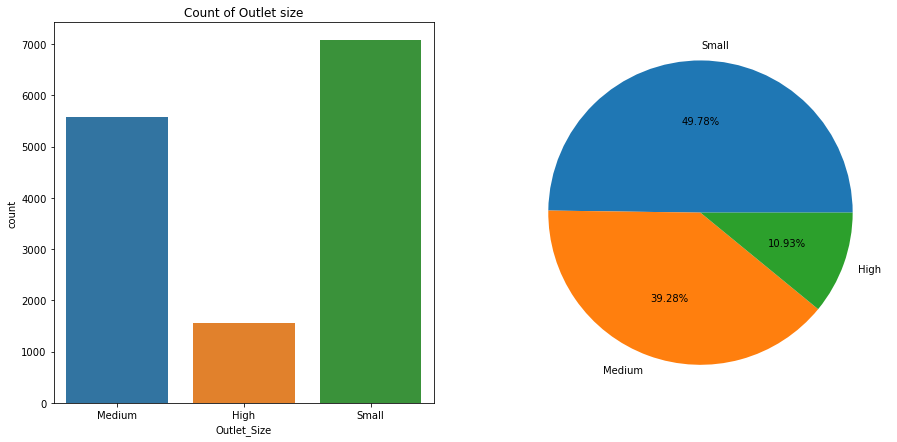

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Outlet size")                 
# Set the title of the graph
percentage = df["Outlet_Size"].value_counts()         
# value_counts: returns the count of values in series: return series
labels = list(df["Outlet_Size"].value_counts().index)
# Converting the index of value counts into list

sns.countplot(x = df["Outlet_Size"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 
# autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

#### MOST OF THE OUTLET SIZE ARE SMALL ALMOST 50%

## Outlet location type

In [24]:
info_of_cat("Outlet_Location_Type") 

Unique values: ['Tier 1' 'Tier 3' 'Tier 2']
Mode: Tier 3
Number of missing values:0


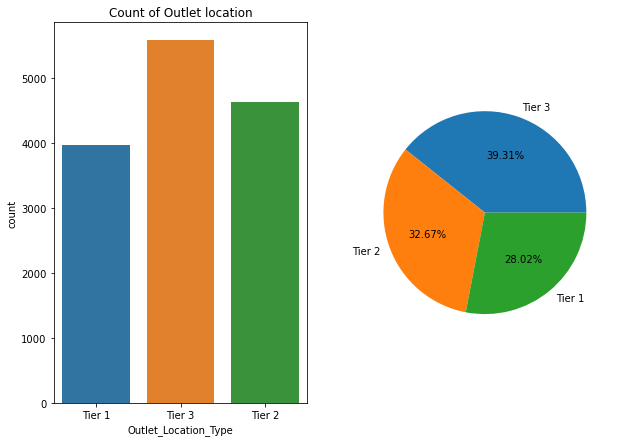

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (10, 7))
ax[0].set_title("Count of Outlet location")                  
# Set the title of the graph
percentage = df["Outlet_Location_Type"].value_counts()        
# value_counts: returns the count of values in series: return series
labels = list(df["Outlet_Location_Type"].value_counts().index)
# Converting the index of value counts into list

sns.countplot(x = df["Outlet_Location_Type"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  
# autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

#### TIER 3 HAS THE HIGHEST NO OF OUTLETS PERSENT IN THE LOCATION

## Outlet type

In [26]:
info_of_cat("Outlet_Type")

Unique values: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
Mode: Supermarket Type1
Number of missing values:0


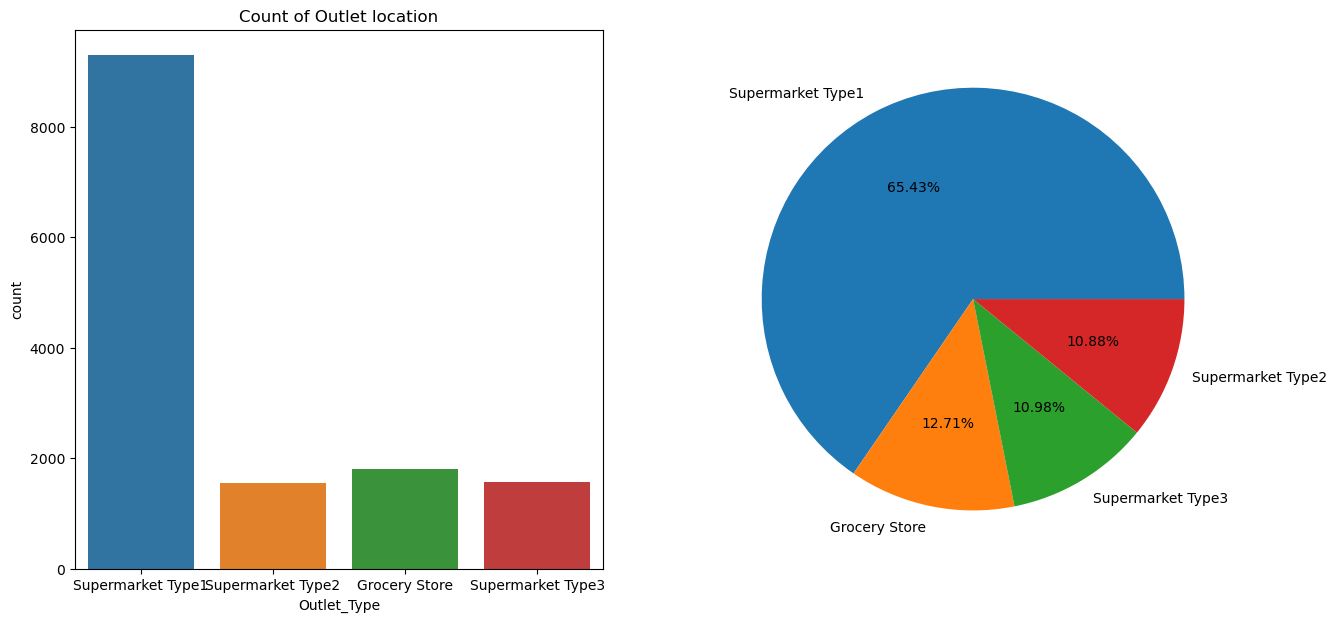

In [43]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of Outlet location")                 
# Set the title of the graph
percentage = df["Outlet_Type"].value_counts()         
# value_counts: returns the count of values in series: return series
labels = list(df["Outlet_Type"].value_counts().index)
# Converting the index of value counts into list

sns.countplot(x = df["Outlet_Type"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 
# autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

#### SUPERMARKET TYPE 1 ARE PRESENT MORE THEN THE COUNTER PARTS

# Univariate Analysis of Numerical Variables

In [27]:
def info_of_numerical(col):
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Mode:{df[col].mode()[0]}")
    print(f"Standard Deviation: {df[col].std()}")
    print(f"Number of missing values:{df[col].isnull().sum()}")

## Item weight

In [28]:
info_of_numerical('Item_Weight')

Mean: 12.793380385807628
Median: 12.6
Mode:17.6
Standard Deviation: 4.6517158036609825
Number of missing values:0


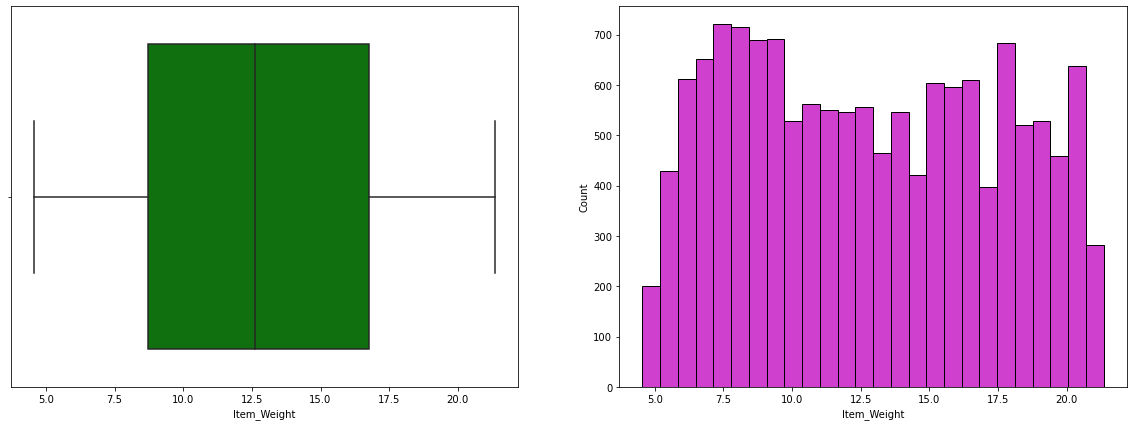

In [29]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["Item_Weight"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["Item_Weight"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

#### Item Weight ranges from  5 TO 21 and the majority of population ranges between 8 - 17

## Item visibility

In [30]:
info_of_numerical("Item_Visibility")

Mean: 0.07030079341671354
Median: 0.062347052
Mode:0.06470883
Standard Deviation: 0.048621198376929964
Number of missing values:0


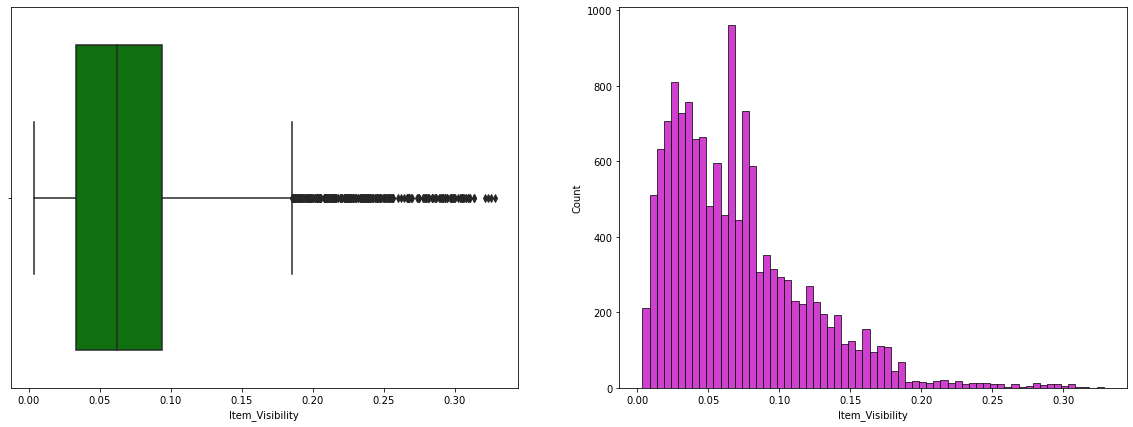

In [31]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["Item_Visibility"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["Item_Visibility"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

#### ITEM VISIBILITY RANGE ARE VERY LESS

### Since the column contains outliers,outlier treatment needs t be performed.

In [32]:
df["Item_Visibility"].quantile(.95)
df["Item_Visibility"]=df["Item_Visibility"].clip(upper=df["Item_Visibility"].quantile(0.95))

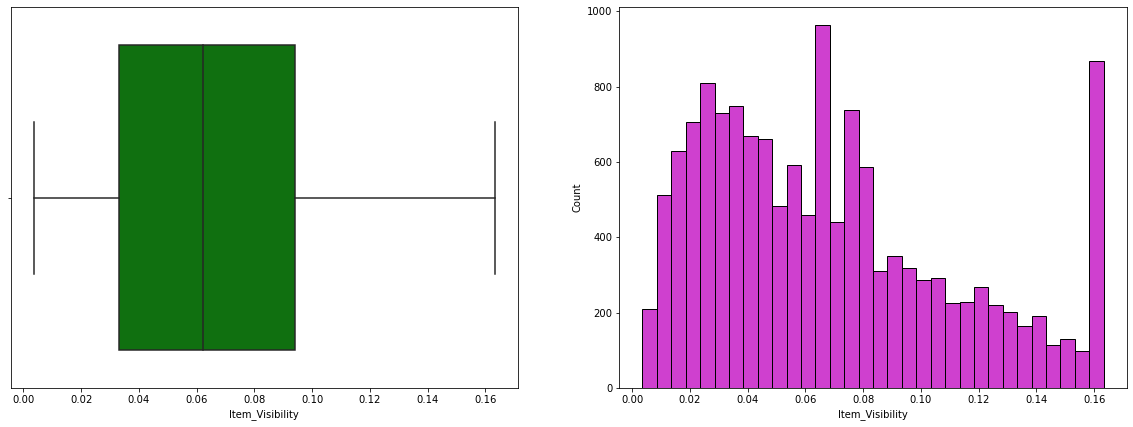

In [33]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["Item_Visibility"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["Item_Visibility"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

#### OUTLIERS HAS BEEN REMOVED BUT RANGE IS STILL THE SAME

## Item mrp

In [34]:
info_of_numerical("Item_MRP") 

Mean: 141.00497725992656
Median: 142.247
Mode:172.0422
Standard Deviation: 62.086938014763994
Number of missing values:0


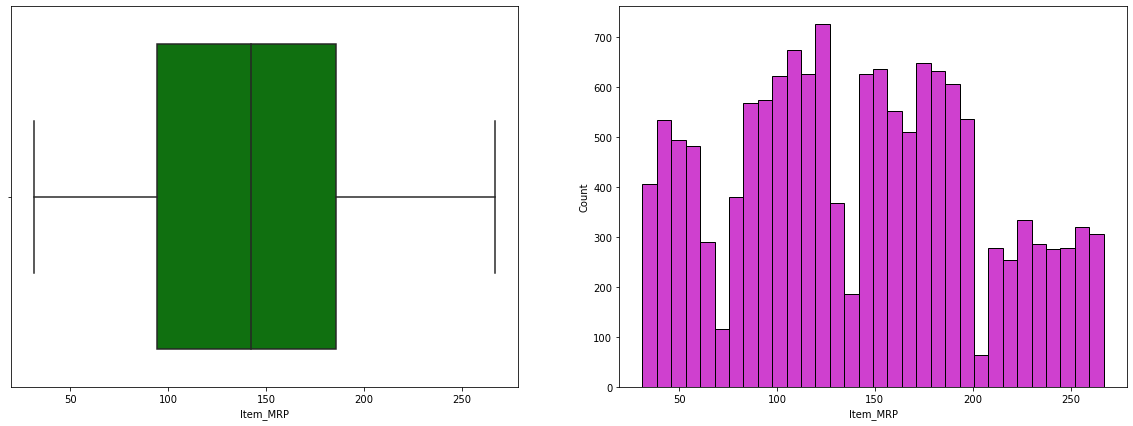

In [35]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["Item_MRP"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["Item_MRP"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

#### ITEM PRICE STARTS FROM 30 TO 270

## Item outlet sales

In [36]:
info_of_numerical("Item_Outlet_Sales") 

Mean: 2181.2889135750365
Median: 1794.331
Mode:958.752
Standard Deviation: 1706.499615733832
Number of missing values:5681


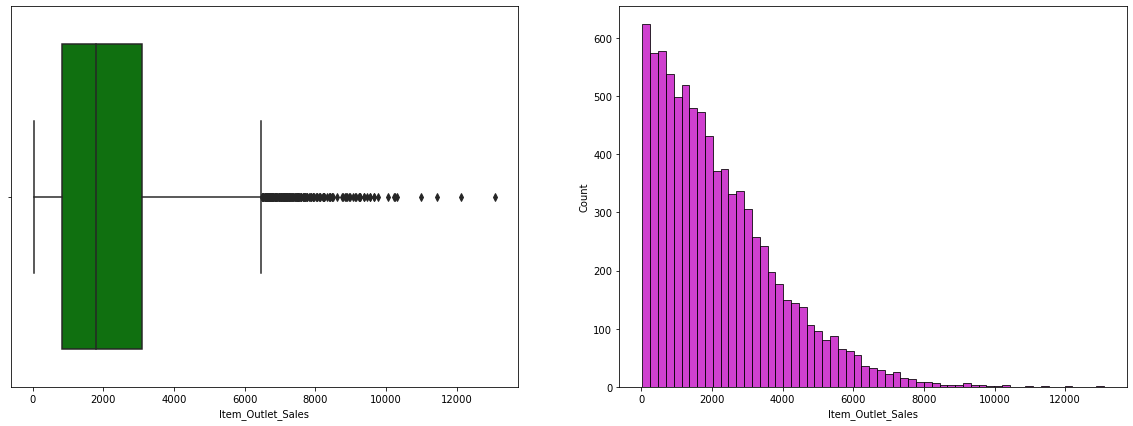

In [37]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["Item_Outlet_Sales"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["Item_Outlet_Sales"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

#### SALES ARE DECREASING FROM 2000

### Outlier treatment:

In [38]:
df["Item_Outlet_Sales"].quantile(.95)
df["Item_Outlet_Sales"]=df["Item_Outlet_Sales"].clip(upper=df["Item_Outlet_Sales"].quantile(0.95))

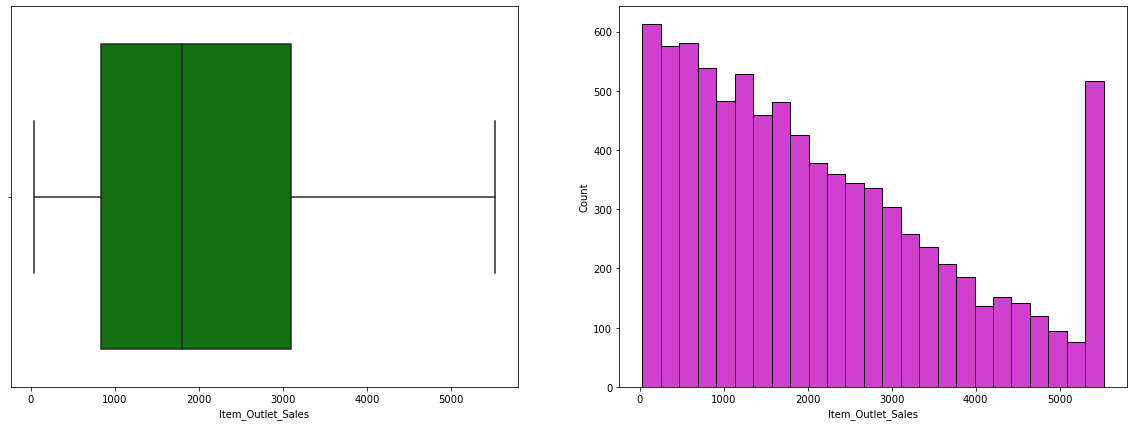

In [39]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["Item_Outlet_Sales"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["Item_Outlet_Sales"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

## Bivariate Data Analysis

#### Item Fat vs Item Type

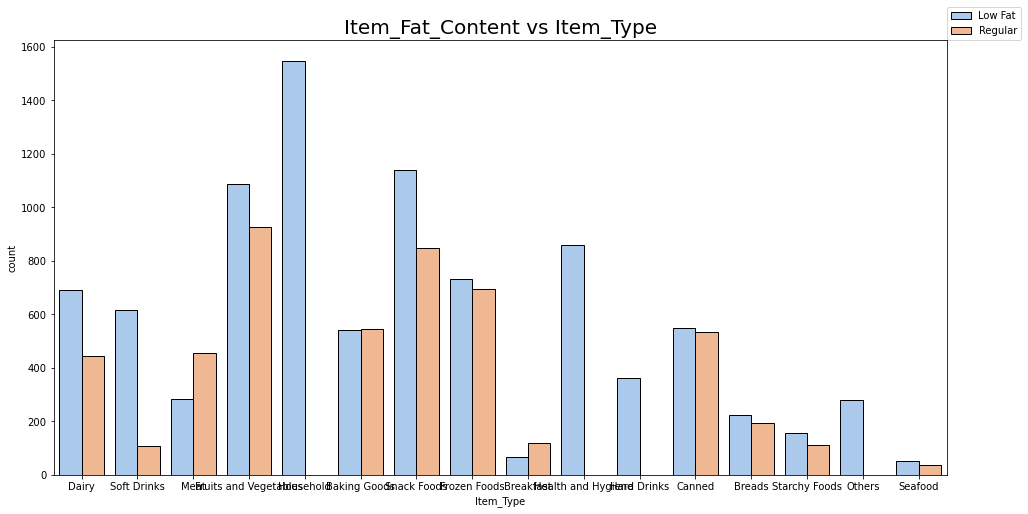

In [43]:
fig, ax=plt.subplots(figsize=(16,8))
sns.countplot(x = "Item_Type", hue = "Item_Fat_Content", data = df,palette='pastel',edgecolor='black')
plt.title('Item_Fat_Content vs Item_Type',fontsize=20)
plt.legend(loc=(1,1))
plt.show()

## Item Fat vs OutLet Location

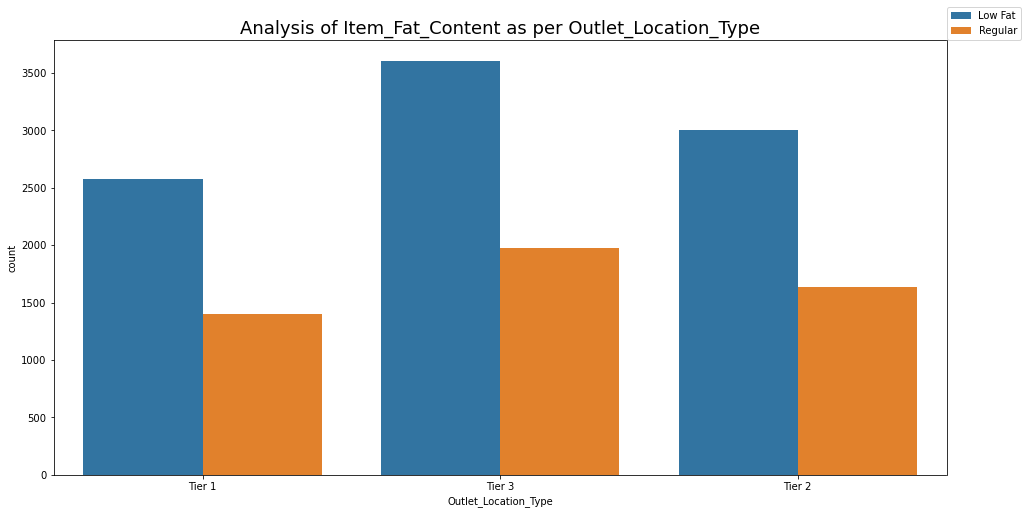

In [45]:
fig, ax = plt.subplots(figsize = (16,8))
plt.title('Analysis of Item_Fat_Content as per Outlet_Location_Type',fontsize=18)
sns.countplot(x = "Outlet_Location_Type", hue = "Item_Fat_Content", data = df)
plt.legend(loc=(1,1))
plt.show()

## Item Type vs OutLet Sales

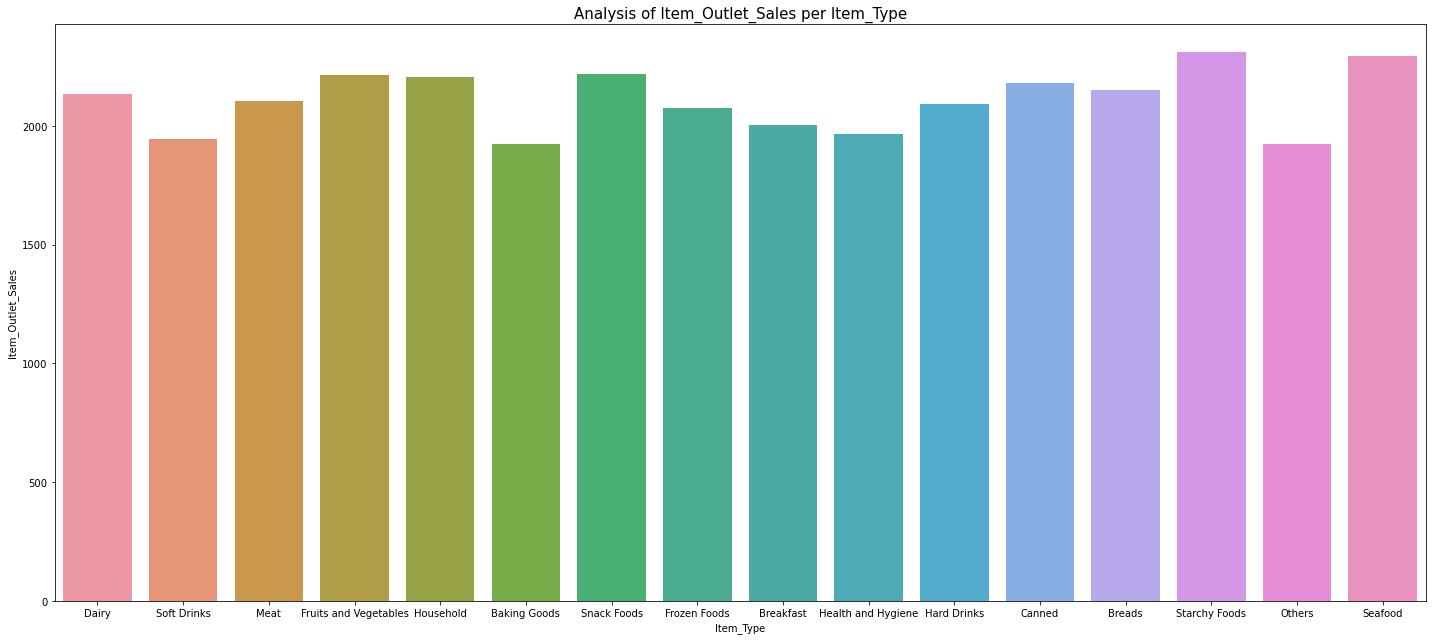

In [48]:
fig, ax = plt.subplots(figsize = (20, 9))
sns.barplot(data=df,y=df['Item_Outlet_Sales'],x=df['Item_Type'],ci=False)
plt.title('Analysis of Item_Outlet_Sales per Item_Type',fontsize=15)
plt.tight_layout()
plt.show()

## Item Outlet Sales vs Outlet Establishment Year

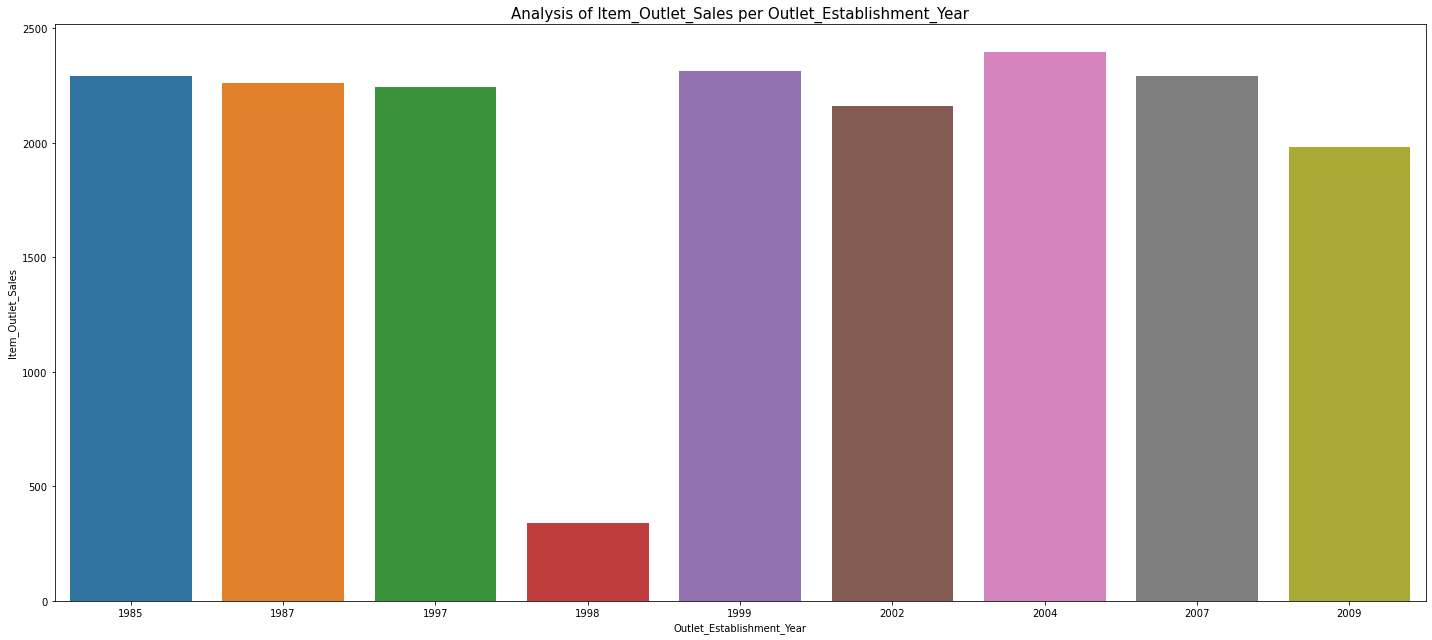

In [50]:
fig, ax = plt.subplots(figsize = (20, 9))
sns.barplot(data=df,y=df['Item_Outlet_Sales'],x=df['Outlet_Establishment_Year'],ci=False)
plt.title('Analysis of Item_Outlet_Sales per Outlet_Establishment_Year',fontsize=15)
plt.tight_layout()
plt.show()

## Item Outlet sales vs Outlet size

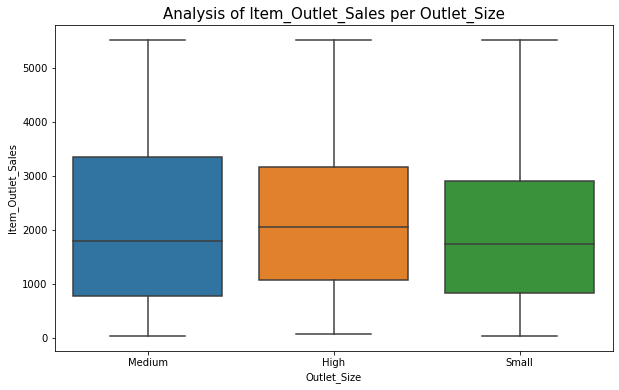

In [52]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(data=df,y=df['Item_Outlet_Sales'],x=df['Outlet_Size'])
plt.title('Analysis of Item_Outlet_Sales per Outlet_Size',fontsize=15)
plt.show()

## Item Outlet Sales vs Outlet Location Type

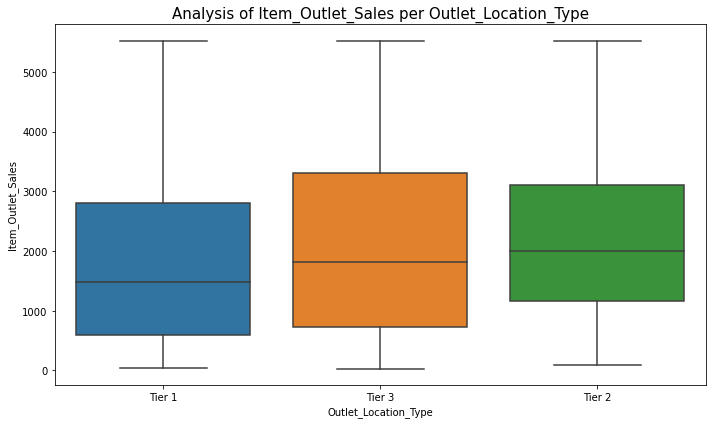

In [54]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(data=df,y=df['Item_Outlet_Sales'],x=df['Outlet_Location_Type'])
plt.title('Analysis of Item_Outlet_Sales per Outlet_Location_Type',fontsize=15)
plt.tight_layout()
plt.show()

## Item Outlet Sales vs Item Fat Content

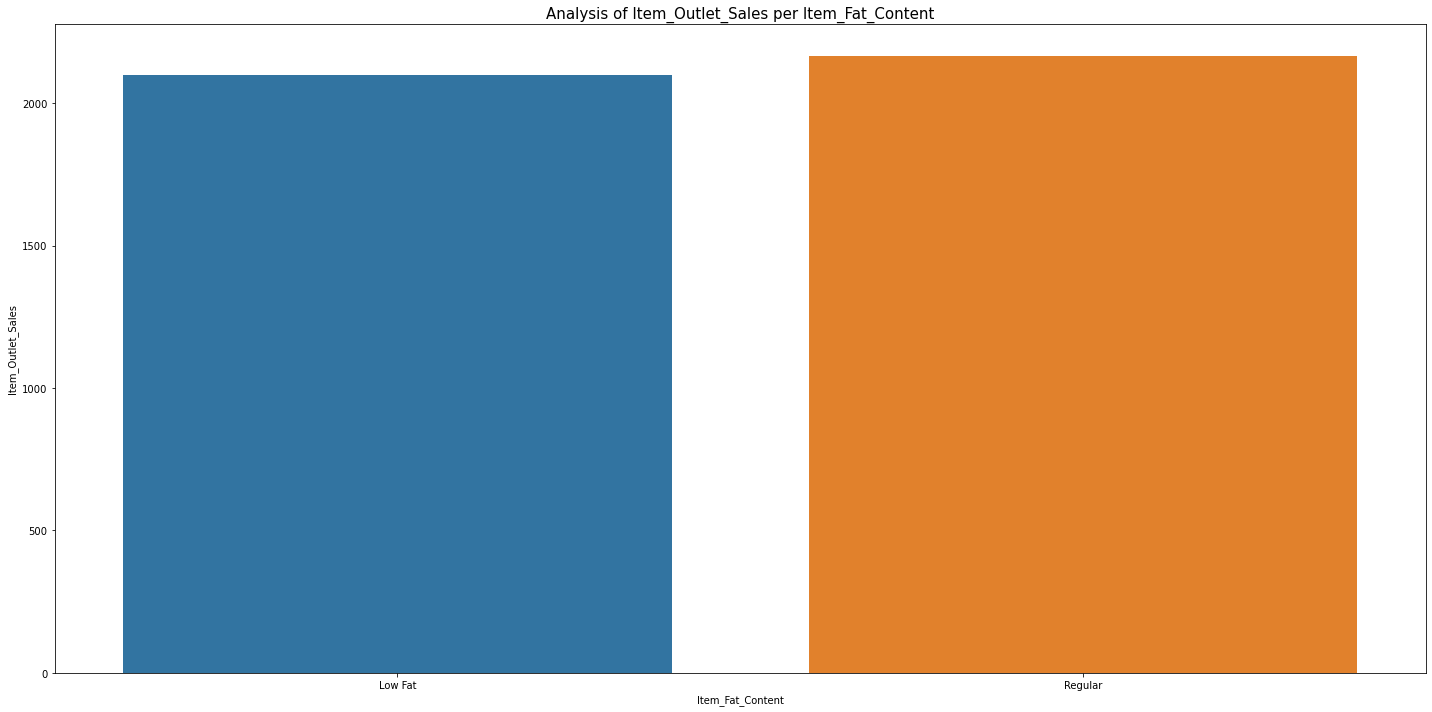

In [55]:
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(data=df,y=df['Item_Outlet_Sales'],x=df['Item_Fat_Content'],ci=False)
plt.title('Analysis of Item_Outlet_Sales per Item_Fat_Content',fontsize=15)
plt.tight_layout()
plt.show()

## Item Outlet Sales vs Outlet type

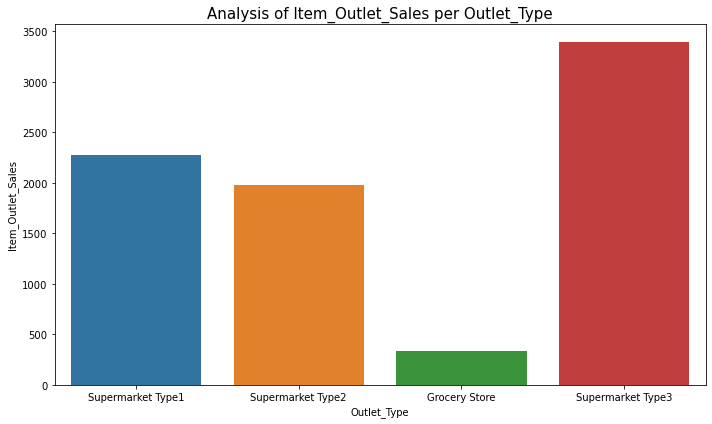

In [56]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.barplot(data=df,y=df['Item_Outlet_Sales'],x=df['Outlet_Type'],ci=False)
plt.title('Analysis of Item_Outlet_Sales per Outlet_Type',fontsize=15)
plt.tight_layout()
plt.show()

## Item MRP vs Item Fat

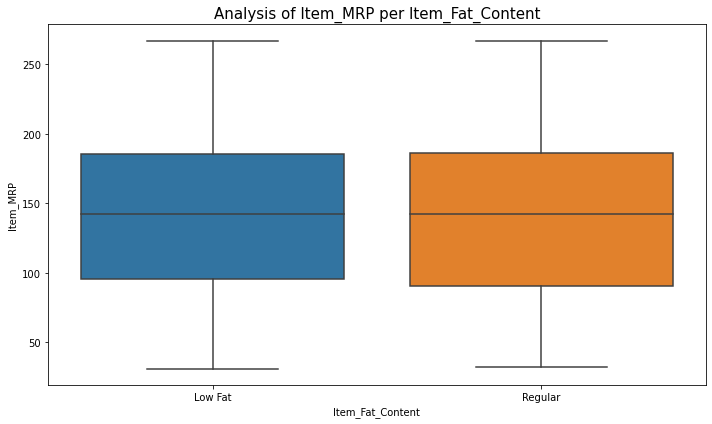

In [57]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(data=df,y=df['Item_MRP'],x=df['Item_Fat_Content'])
plt.title('Analysis of Item_MRP per Item_Fat_Content',fontsize=15)
plt.tight_layout()
plt.show()

## Item MRP vs Outlet Type

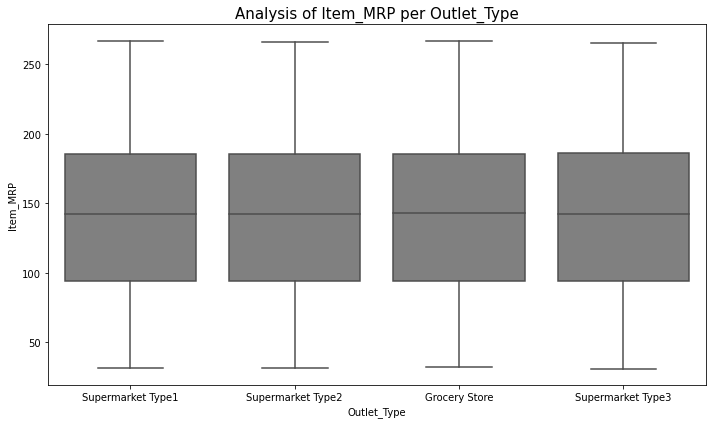

In [59]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(data=df,y=df['Item_MRP'],x=df['Outlet_Type'],color='grey')
plt.title('Analysis of Item_MRP per Outlet_Type',fontsize=15)
plt.tight_layout()
plt.show()

In [62]:
df1=df.copy()
columns=df1.columns

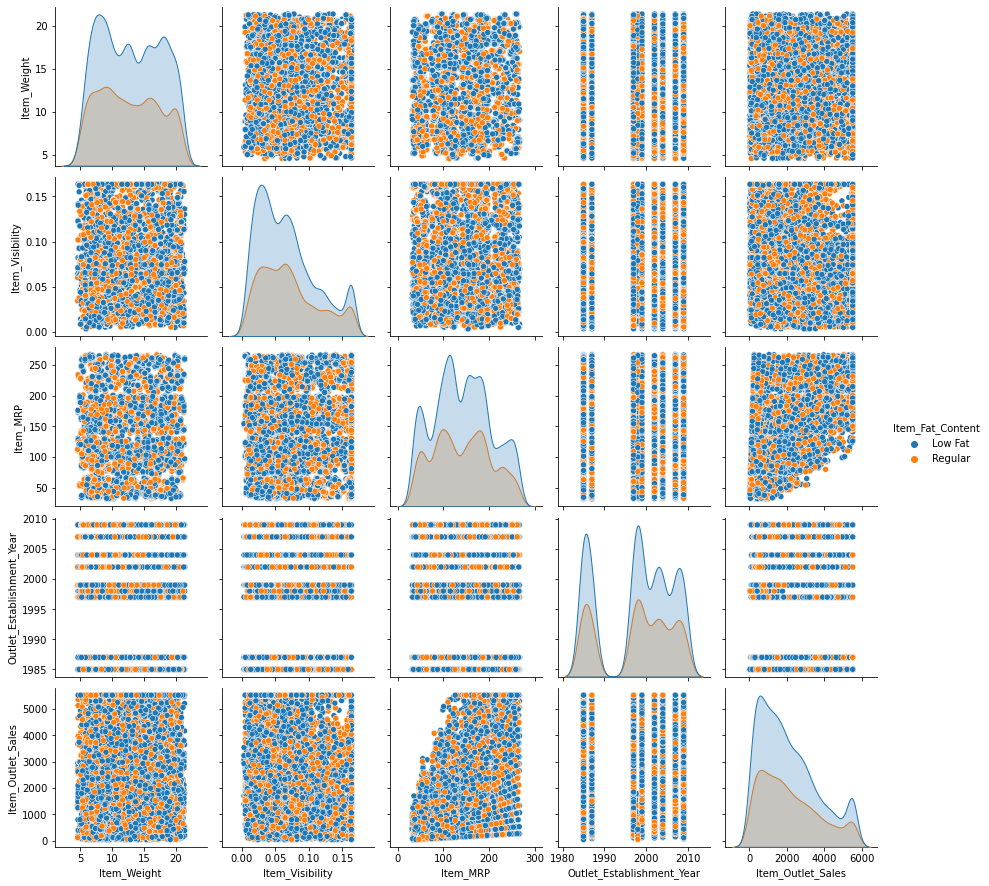

In [63]:
sns.pairplot(df1,diag_kind='kde',hue='Item_Fat_Content');

## Converting the category types:

In [75]:
# Converting non-numeric labeled column into categorical column
df1['Item_Fat_Content']=df1['Item_Fat_Content'].astype('category')
df1['Item_Type']=df1['Item_Type'].astype('category')
df1['Outlet_Identifier']=df1['Outlet_Identifier'].astype('category')
df1['Outlet_Establishment_Year']=df1['Outlet_Establishment_Year'].astype('category')
df1['Outlet_Size']=df1['Outlet_Size'].astype('category')
df1['Outlet_Location_Type']=df1['Outlet_Location_Type'].astype('category')
df1['Outlet_Type']=df1['Outlet_Type'].astype('category')
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [68]:
df1.dtypes

Item_Identifier                object
Item_Weight                   float64
Item_Fat_Content             category
Item_Visibility               float64
Item_Type                    category
Item_MRP                      float64
Outlet_Identifier            category
Outlet_Establishment_Year    category
Outlet_Size                  category
Outlet_Location_Type         category
Outlet_Type                  category
Item_Outlet_Sales             float64
dtype: object

## Label encoding:

In [77]:
# Using Label Encoder technique to convert categorical column into numerical type

#label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
df1['Item_Fat_Content_encode']= label_encoder.fit_transform(df1['Item_Fat_Content'])
 
df1['Item_Fat_Content_encode'].unique()

array([0, 1])

In [79]:
df1['Item_Type_encode']= label_encoder.fit_transform(df1['Item_Type'])
 
df1['Item_Type_encode'].unique()

array([ 4, 14, 10,  6,  9,  0, 13,  5,  2,  8,  7,  3,  1, 15, 11, 12])

In [80]:
# Using Label Encoder technique to convert categorical column into numerical type

#label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
df1['Outlet_Identifier_encode']= label_encoder.fit_transform(df1['Outlet_Identifier'])
 
df1['Outlet_Identifier_encode'].unique()

array([9, 3, 0, 1, 5, 7, 2, 8, 6, 4])

In [81]:
df1['Outlet_Establishment_Year_encode']= label_encoder.fit_transform(df1['Outlet_Establishment_Year'])
 
df1['Outlet_Establishment_Year_encode'].unique()

array([4, 8, 3, 1, 0, 5, 7, 2, 6], dtype=int64)

In [82]:
df1['Outlet_Size_encode']= label_encoder.fit_transform(df1['Outlet_Size'])
 
df1['Outlet_Size_encode'].unique()

array([1, 0, 2])

In [83]:
df1['Outlet_Location_Type_encode']= label_encoder.fit_transform(df1['Outlet_Location_Type'])
 
df1['Outlet_Location_Type_encode'].unique()

array([0, 2, 1])

In [84]:
df1['Outlet_Type_encode']= label_encoder.fit_transform(df1['Outlet_Type'])
 
df1['Outlet_Type_encode'].unique()

array([1, 2, 0, 3])

## Scaling:

In [89]:
# Defining method to perform data scaling operation based on the type of scaling
def feature_scale(scale):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    new_sales_df_c = df1.select_dtypes(include='number')
    if scale == 'minmax':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(new_sales_df_c.to_numpy()),columns=new_sales_df_c.columns)
    return df_scaled

In [90]:
scale = 'minmax' #standard
sales_df_scaled=feature_scale(scale)
sales_df_scaled

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_encode,Item_Type_encode,Outlet_Identifier_encode,Outlet_Establishment_Year_encode,Outlet_Size_encode,Outlet_Location_Type_encode,Outlet_Type_encode
0,0.282525,0.078093,0.927507,0.674348,0.0,0.266667,1.000000,0.500,0.5,0.0,0.333333
1,0.081274,0.098322,0.072068,0.074712,1.0,0.933333,0.333333,1.000,0.5,1.0,0.666667
2,0.770765,0.082556,0.468288,0.375985,0.0,0.666667,1.000000,0.500,0.5,0.0,0.333333
3,0.871986,0.443464,0.640093,0.127350,1.0,0.400000,0.000000,0.375,0.5,1.0,0.000000
4,0.260494,0.380205,0.095805,0.175136,0.0,0.600000,0.111111,0.125,0.0,1.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
14199,0.353974,0.062122,0.467004,NaN,1.0,0.866667,0.888889,0.250,1.0,0.0,0.333333
14200,0.181304,0.872908,0.585126,NaN,1.0,1.000000,0.333333,1.000,0.5,1.0,0.666667
14201,0.324204,0.437993,0.371199,NaN,0.0,0.533333,0.777778,0.625,1.0,0.5,0.333333
14202,0.639774,0.382771,0.778154,NaN,1.0,0.200000,0.222222,0.875,1.0,0.5,0.333333


## Correlation:

In [91]:
# Finding correlation among numerical features, based on their strong relation we can choose the important features
corr=sales_df_scaled.corr()
corr.style.background_gradient(cmap='coolwarm')

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_encode,Item_Type_encode,Outlet_Identifier_encode,Outlet_Establishment_Year_encode,Outlet_Size_encode,Outlet_Location_Type_encode,Outlet_Type_encode
Item_Weight,1.000000,-0.019416,0.035751,0.011997,-0.033737,0.031884,0.003002,0.000301,0.000944,-0.001719,0.001913
Item_Visibility,-0.019416,1.000000,-0.007111,-0.119324,0.051531,-0.040467,-0.089475,-0.081446,0.022055,-0.015030,-0.139953
Item_MRP,0.035751,-0.007111,1.000000,0.576802,-0.004019,0.043948,-0.000555,0.000302,-0.001305,0.000838,0.000136
Item_Outlet_Sales,0.011997,-0.119324,0.576802,1.000000,0.020904,0.018688,0.175602,-0.003980,-0.057200,0.079174,0.399203
Item_Fat_Content_encode,-0.033737,0.051531,-0.004019,0.020904,1.000000,-0.147733,-0.001095,0.000142,-0.000827,0.001373,-0.000228
Item_Type_encode,0.031884,-0.040467,0.043948,0.018688,-0.147733,1.000000,0.001126,0.003295,-0.001080,0.002083,0.004305
Outlet_Identifier_encode,0.003002,-0.089475,-0.000555,0.175602,-0.001095,0.001126,1.000000,-0.030948,0.423623,-0.716151,0.099899
Outlet_Establishment_Year_encode,0.000301,-0.081446,0.000302,-0.003980,0.000142,0.003295,-0.030948,1.000000,0.323491,0.041889,-0.040255
Outlet_Size_encode,0.000944,0.022055,-0.001305,-0.057200,-0.000827,-0.001080,0.423623,0.323491,1.000000,-0.590677,-0.260496
Outlet_Location_Type_encode,-0.001719,-0.015030,0.000838,0.079174,0.001373,0.002083,-0.716151,0.041889,-0.590677,1.000000,0.467251


<AxesSubplot:>

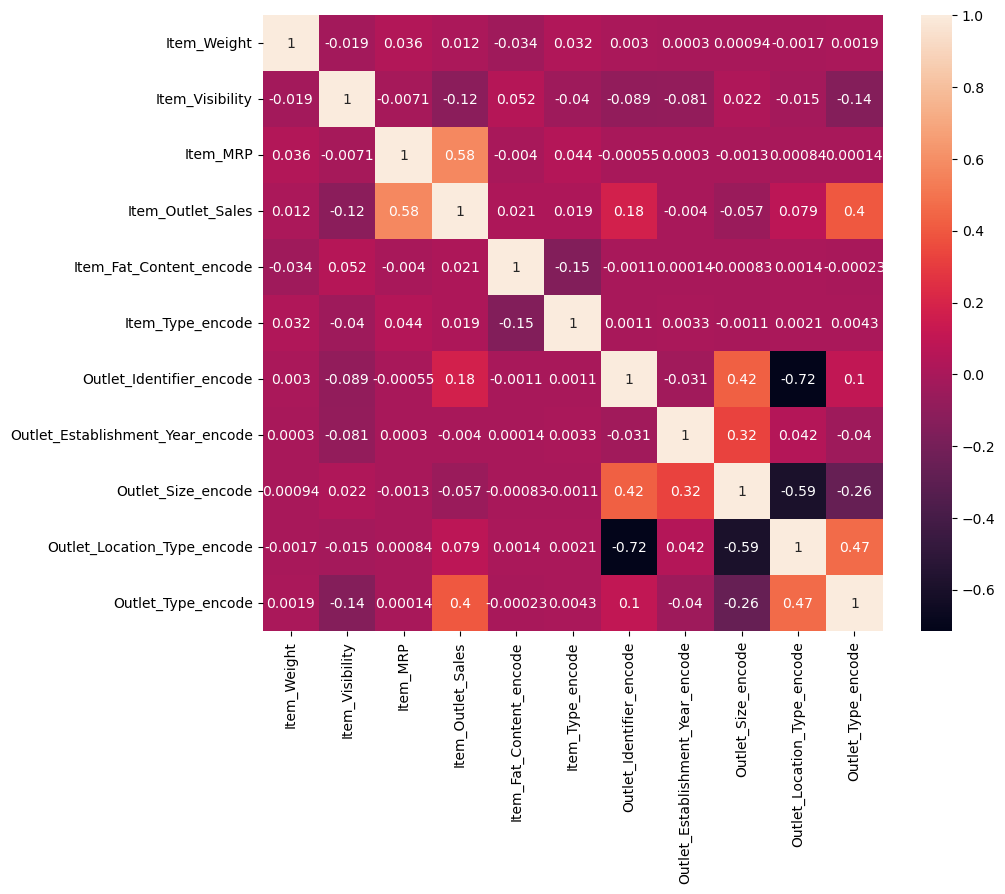

In [97]:
plt.figure(figsize=(10,8))
sns.heatmap(sales_df_scaled.corr(),annot=True)

## Histogram of all numerical features.

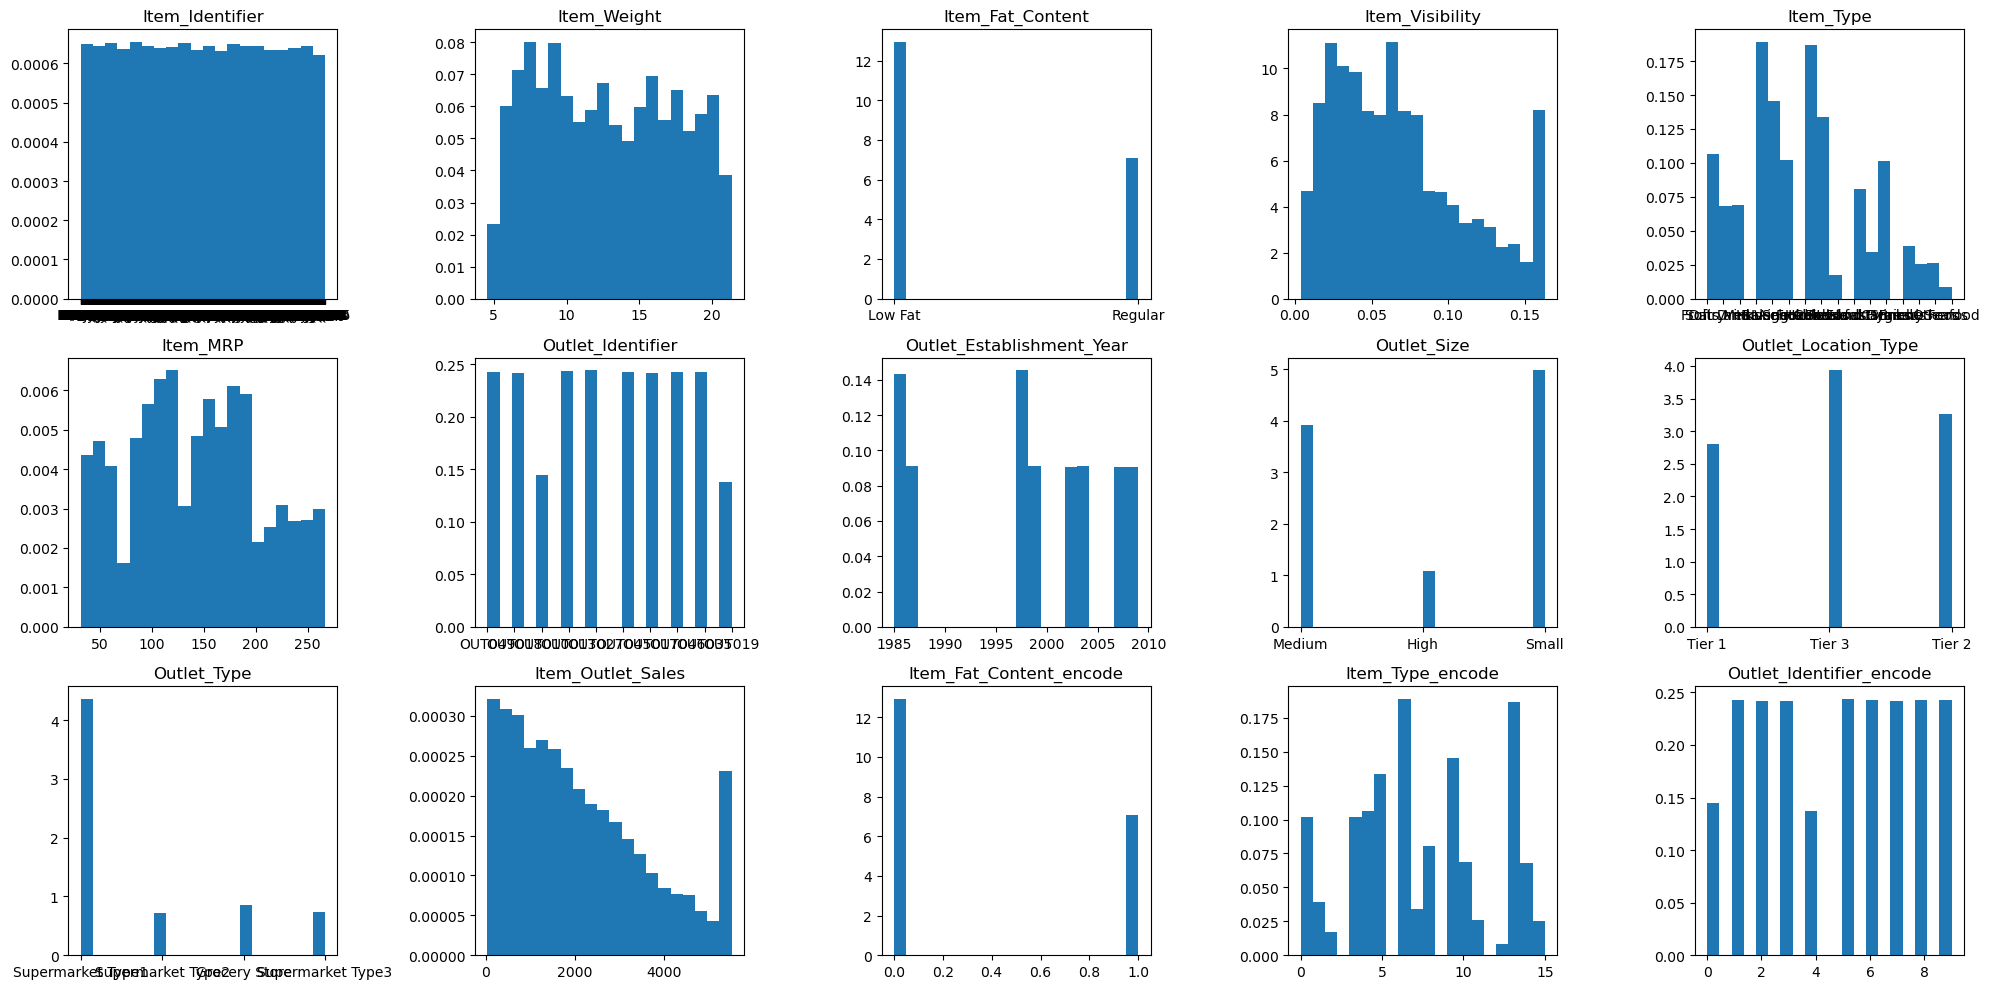

In [99]:
# Histogram of all numerical features

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

new_df = df1.select_dtypes(include='number')
numeric_cols=df1.columns
num_cols=5
n_bins = 20

# compute number of rows for plot 
num_rows= int(len(numeric_cols)/num_cols)

# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,10))

# plotting the numerical columns
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
    ax.hist(df1[col],bins=n_bins,density=True)
    ax.set_title(col)

plt.show()

## Histogram of categorical features:

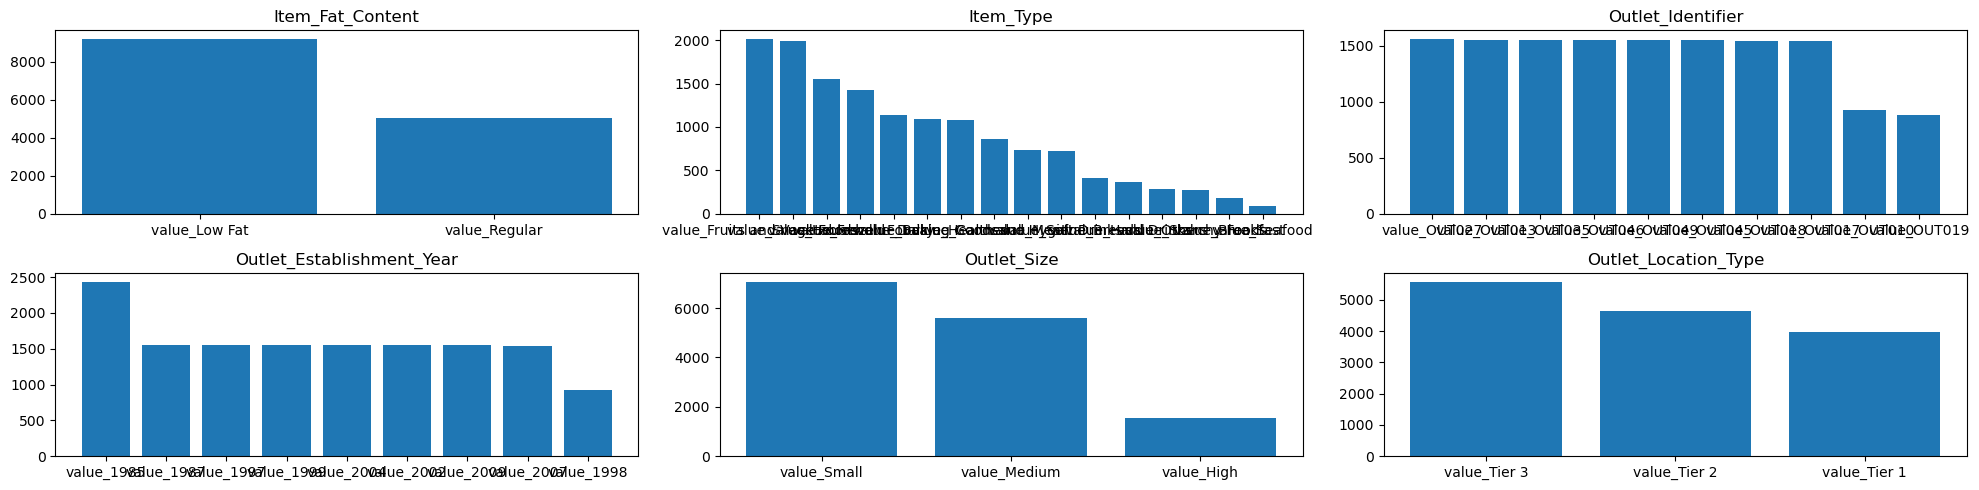

In [234]:
# Histogram of all categorical features
num_cols = 3
cat_sal = df1.select_dtypes('category')
categorical_cols=cat_sal.columns
# compute number of rows for plot 
num_rows= int(len(categorical_cols)/num_cols)

# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,5))

# plotting the numerical columns
for col, ax in zip(categorical_cols,axs.flatten()[:len(categorical_cols)]):
    stats = cat_sal[col].value_counts()
    values = list(stats)
    names = list(map(lambda x : ''.join(('value_',str(x))),list(stats.index)))
    ax.bar(names,values)
    ax.set_title(col)
    
plt.show()

## Splitting data into train and test.

In [202]:
df2=df1.select_dtypes('number')

In [203]:
train=df2[~df2['Item_Outlet_Sales'].isnull()]
test=df2[df2['Item_Outlet_Sales'].isnull()]

In [204]:
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_encode,Item_Type_encode,Outlet_Identifier_encode,Outlet_Establishment_Year_encode,Outlet_Size_encode,Outlet_Location_Type_encode,Outlet_Type_encode
0,9.30,0.016047,249.8092,3735.1380,0,4,9,4,1,0,1
1,5.92,0.019278,48.2692,443.4228,1,14,3,8,1,2,2
2,17.50,0.016760,141.6180,2097.2700,0,10,9,4,1,0,1
3,19.20,0.074402,182.0950,732.3800,1,6,0,3,1,2,0
4,8.93,0.064299,53.8614,994.7052,0,9,1,1,0,2,1


## Linear regression:

In [205]:
x_train=train.loc[:,train.columns!='Item_Outlet_Sales']
y_train=train['Item_Outlet_Sales']

In [206]:
x_test=test.loc[:,test.columns!='Item_Outlet_Sales']
y_test=test['Item_Outlet_Sales']

In [207]:
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
model=reg.fit(x_train,y_train)

In [208]:
model.intercept_

-796.920790610623

In [209]:
model.coef_

array([-9.35369922e-01, -1.67694996e+03,  1.43048066e+01,  6.02672754e+01,
       -2.32121691e-01,  5.73527677e+01,  1.39067392e+01, -8.92724148e+01,
       -1.09760514e+02,  7.76623736e+02])

In [210]:
model.score(x_train,y_train)

0.5147488642895343

In [211]:
print("The equation of model for  sales is: y = %f x + %f"%(model.coef_[0] ,model.intercept_  ))

The equation of model for  sales is: y = -0.935370 x + -796.920791


In [212]:
predict=model.predict(x_test)
predict

array([1970.0679521 , 1139.67709293, 2211.05546948, ..., 1726.49624067,
       2910.31994143, 1178.94146472])

In [215]:
dfpr = pd.DataFrame(predict, columns=['Prediction'])
dfpr.head(6)

,Prediction
0,1970.067952
1,1139.677093
2,2211.055469
3,2085.516326
4,4709.268314
5,1906.280048


## Decision Tree Regressor:

In [216]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn import tree

In [217]:
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

dtm.fit(x_train,y_train)
print("R-Squared on train dataset={}".format(dtm.score(x_train,y_train)))

R-Squared on train dataset=0.6020076243296916


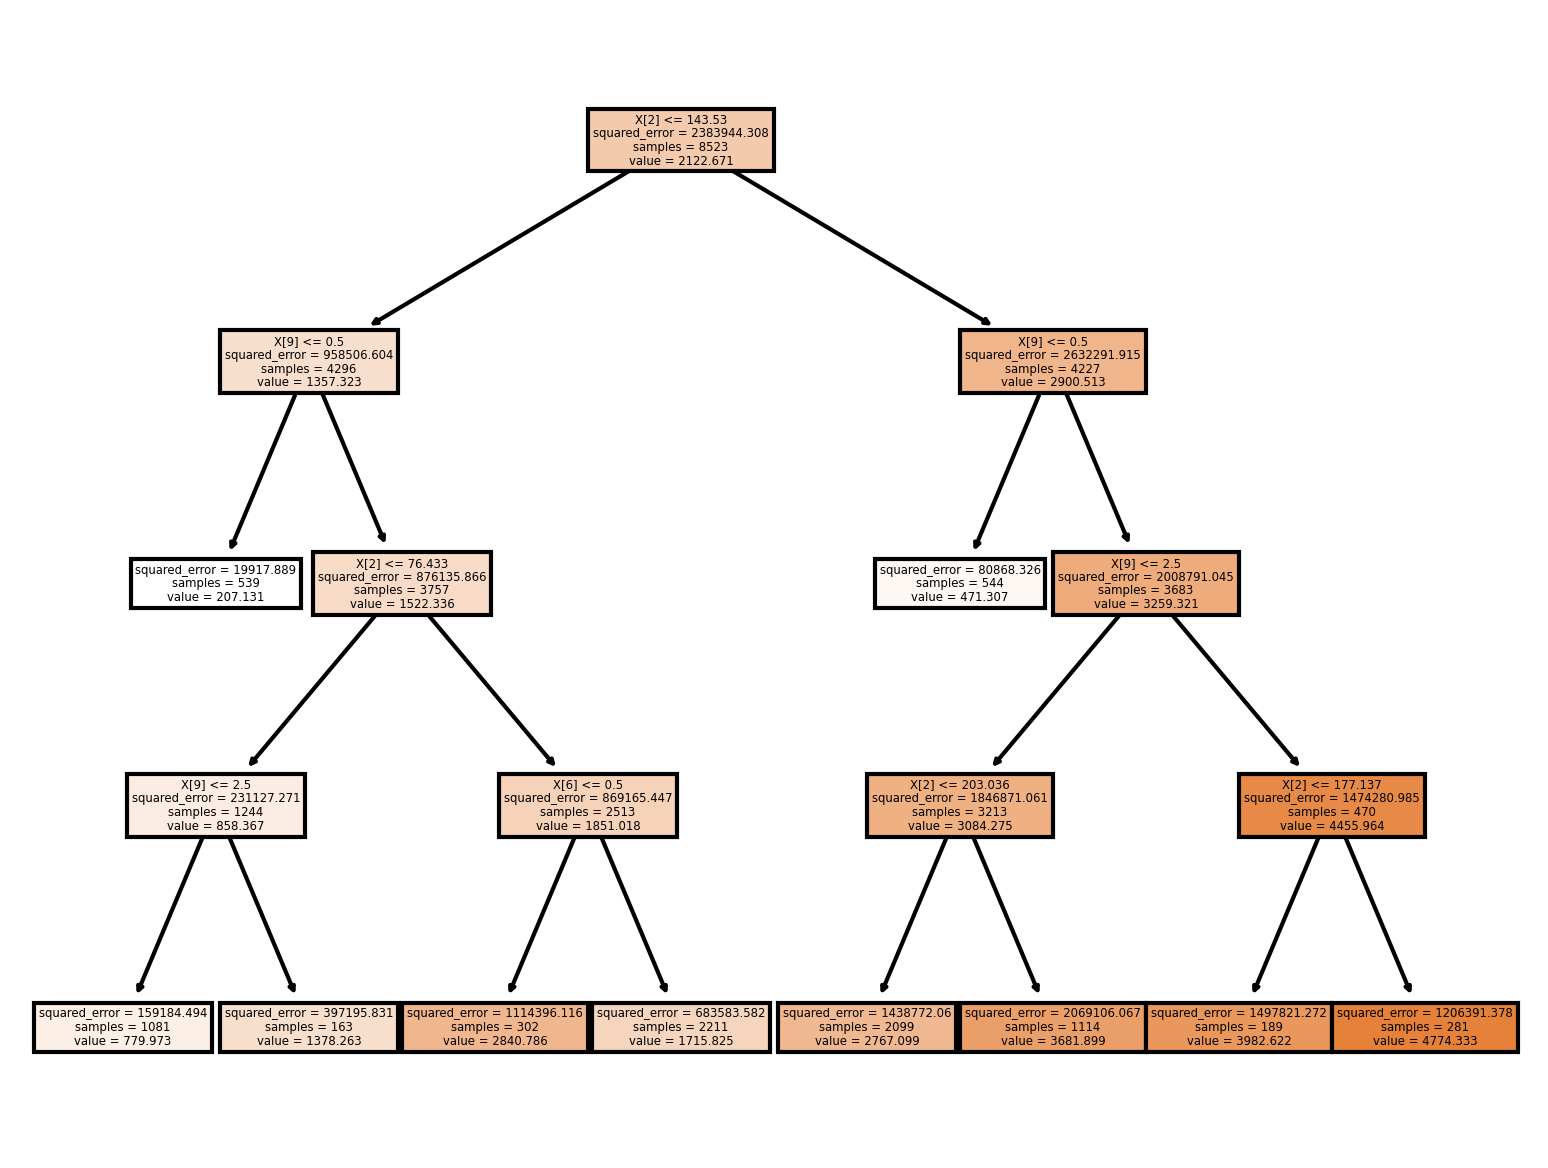

In [218]:
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(dpi=300)

tree.plot_tree(dtm,
           filled = True);

#save figure in current directory as png
fig.savefig('Bike_regression_decisiontree.png')

In [219]:
y_dec_pred = dtm.predict(x_test)

In [220]:
df_dt = pd.DataFrame(y_dec_pred, columns=['Prediction'])
df_dt.head()

,Prediction
0,1715.825320
1,1715.825320
2,471.306847
3,2767.099057
4,4774.333330


## Random forest:

In [221]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=100,criterion='squared_error',random_state=1,n_jobs=-1)
forest.fit(x_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=1)

In [222]:
forest.score(x_train,y_train)

0.9413701064319908

In [223]:
y_pred_rf=forest.predict(x_test)

In [224]:
df_dt = pd.DataFrame(y_pred_rf, columns=['Prediction'])
df_dt.head()

,Prediction
0,1716.958382
1,1202.221744
2,648.589070
3,2179.003608
4,5142.579278


In [225]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [168]:
# Instantiate the grid search model
from sklearn.model_selection import GridSearchCV

In [226]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=forest,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="r2")

In [227]:
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestRegressor(n_jobs=-1, random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='r2', verbose=1)

In [228]:
grid_search.best_score_

0.6150108510831545

In [229]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestRegressor(max_depth=5, min_samples_leaf=10, n_jobs=-1,
                      random_state=1)

In [230]:
y_pred_rf1=model.predict(x_test)
df_rf1 = pd.DataFrame(y_pred_rf1, columns=['Prediction'])
df_rf1.head()

,Prediction
0,1970.067952
1,1139.677093
2,2211.055469
3,2085.516326
4,4709.268314


## Comparison:

In [231]:
print('linear regression score:',model.score(x_train,y_train))
print('Decision tree score:',dtm.score(x_train,y_train))
print('Random forest score without hyperparameter tuning:',forest.score(x_train,y_train))
print('Random forest with hyperparameter tuning:',grid_search.best_score_)

linear regression score: 0.5147488642895343
Decision tree score: 0.6020076243296916
Random forest score without hyperparameter tuning: 0.9413701064319908
Random forest with hyperparameter tuning: 0.6150108510831545


#### Random Forest model without hyperparameter tuning has the best score.So it is the best suited model.